# Exercícios 1 e 3 (tarefa para retorno 1)

### Ex. 1: Analise e quantifique a relação da variável survived com a variável sex usando o conjunto de dados do titanic. Faça seus gráficos e calcule o chi-quadrado para quantificar a relação.


**Explicação:** aqui iremos verificar se a sobrevivência tem relação direta com o sexo do passageiro, ou seja, a taxa de mulheres sobreviventes foi maior do que a de homens? 

É importante ter sempre em mente a hipótese que queremos testar, nesse caso pode ser por exemplo: 

    - h0 = a taxa de sobrevivência tem relação direta com o sexo do passageiro. (Hipótese nula)
    - h1 = a taxa de sobrevivência não tem relação direta com o sexo do passageiro. (Hipótese alternativa)

Aqui estamos estudando duas variáveis categóricas: survived = 0 ou 1 e sex = male ou female, por isso podemos usar o chi-quadrado.

O chi-quadrado tem como princípio básico comparar proporções, ou seja, possíveis divergências entre as frequências observadas e esperadas para um certo evento.


**Etapas básicas:**

- Carregar os dados titanic.csv;
- Analisar a tabela;
- Estudar a relação entre as variáveis survived e sex;
    - Criar diferentes gráficos
    - Calcular chi-quadrado
    

Obs.: Todos os códigos são correspondentes aos códigos vistos em aula!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
prob_sobrev_geral = (df[df.Survived==1].shape[0]) / df.Survived.shape[0]
prob_sobrev_mulher = df[(df.Survived==1) & (df.Sex=='female')].shape[0] / df[(df.Sex=='female')].shape[0]
prob_sobrev_homem = df[(df.Survived==1) & (df.Sex=='male')].shape[0] / df[(df.Sex=='male')].shape[0]

print ('A probabilidade de sobreviver da população geral é: ', round(prob_sobrev_geral*100,2),'%')
print ('A probabilidade de sobreviver sendo mulher é: ', round(prob_sobrev_mulher*100,2),'%')
print ('A probabilidade de sobreviver sendo homem é: ', round(prob_sobrev_homem*100,2),'%')

A probabilidade de sobreviver da população geral é:  38.38 %
A probabilidade de sobreviver sendo mulher é:  74.2 %
A probabilidade de sobreviver sendo homem é:  18.89 %


### Como as probabilidades de sobrevivência por sexo diferem da probabilidade geral, vamos investigar a relação entre as duas variáveis qualitativas.

In [4]:
# criação de tabela derivada da original, com as frequências absolutas da variável survived agrupada por sex

df_sex=df.groupby(by='Sex').apply(lambda x: x.Survived.value_counts()).unstack()
df_sex

,0,1
Sex,,
female,81,233
male,468,109


In [5]:
# criação de tabela de frequência relativa (proporcional) de sobreviventes por sexo

df_sex_pct=df.groupby(by='Sex').apply(lambda x: x.Survived.value_counts() / x.shape[0]).unstack()
df_sex_pct

,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [6]:
pct_morreram = df_sex.iloc[:,0].sum() / df_sex.sum().sum()
pct_sobreviveram = df_sex.iloc[:,1].sum() / df_sex.sum().sum()

In [7]:
# adicionar à tabela de frequência relativa a informação da taxa de sobrevivência geral por sexo para incluir no gráfico

df_sex_pct.loc['geral']=[pct_morreram,pct_sobreviveram]
df_sex_pct

,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908
geral,0.616162,0.383838


In [8]:
labels = list(df_sex_pct.index)
x = np.arange(len(labels))

labels1 = list(df_sex.index)
x1 = np.arange(len(labels1))

width = 0.35


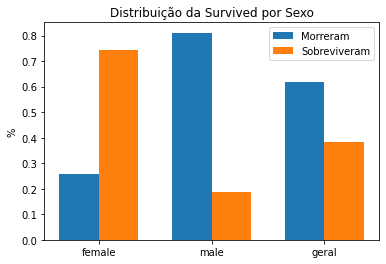

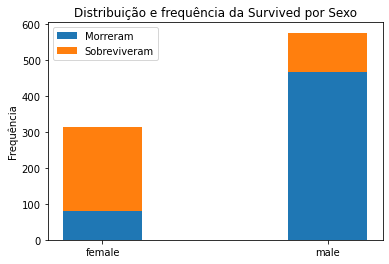

In [9]:
# construção de dois gráficos para auxiliar na visualização dos dados: frequências relativas por sexo e geral /
# frequência absoluta por sexo

fig,ax = plt.subplots()
rects1 = ax.bar(x-width/2,df_sex_pct[0],width,label='Morreram')
rect1 = ax.bar(x+width/2,df_sex_pct[1],width,label='Sobreviveram')
ax.set_ylabel('%')
ax.set_title('Distribuição da Survived por Sexo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

fig,ax1 = plt.subplots()
rects2 = ax1.bar(x1,df_sex[0],width,label='Morreram')
rects3 = ax1.bar(x1,df_sex[1],width,bottom=df_sex[0],label='Sobreviveram')

ax1.set_ylabel('Frequência')
ax1.set_title('Distribuição e frequência da Survived por Sexo')
ax1.set_xticks(x1)
ax1.set_xticklabels(labels1)
ax1.legend()

plt.show()

#### Os gráficos evidenciam a divergência entre as taxas de sobrevivência esperadas, dada a observação do grupo / população total.
#### Ou seja, o sexo do passageiro tem relação com a probabilidade de sobreviver. Vamos medir essa divervência calculando o chi-quadrado

In [10]:
# acresentamos a coluna com os totais por sexo para poder calcular as frequências esperadas a partir da taxa de
# sobrevivência global

df_sex['total']=df_sex[[0]].values + df_sex[[1]].values
df_sex

,0,1,total
Sex,,,
female,81,233,314
male,468,109,577


In [11]:
# cálculo das frequências esperadas de mortes e sobreviventes

esp_0 = df_sex.total * pct_morreram
esp_1 = df_sex.total * pct_sobreviveram
df_sex_esp = pd.DataFrame(np.c_[esp_0,esp_1])
df_sex_esp

,0,1
0,193.474747,120.525253
1,355.525253,221.474747


In [12]:
# cálculo dos desvios de cada evento em relação ao esperado

desvios_ao_quad = (df_sex.iloc[:,:2].values - df_sex_esp.iloc[:,:2].values)**2
desvios_ao_quad

array([[12650.56881951, 12650.56881951],
       [12650.56881951, 12650.56881951]])

In [13]:
#cálculo do chi-quadrado

chi_quad = sum(sum(desvios_ao_quad / df_sex_esp.values))
print ('O chi-quadrado é: ', round(chi_quad,2))

O chi-quadrado é:  263.05


O valor do chi-quadrado calculado é de 263.05. Sendo diferente de 0, indica a divergência entre o observado e o esperado. Ou seja, a probabilidade de sobreviver tem grandes chances de ser diferente o esperado da pop. geral, conforme o sexo do passageiro.

OBS: diferente do r2 e da correlação linear, não saberia ainda interpretar quantitativamente o valor do chi-quadrado. Preciso aprofundar os conhecimentos em estatística.

### Ex3: Use o dataframe df, carregado abaixo, onde cada observação corresponde a uma reclamação feita pelo consumidor, para responder as perguntas abaixo:


1 - Qual o número de reclamações por Estado?

    - Calcular a quantidade de reclamações de acordo com os estados.

2 - Qual a quantidade de reclamações por sexo?

    - Calcular a quantidade de reclamações de acordo com o sexo do consumidor.

3 - O tempo de resposta tem alguma correlação com a nota do consumidor?

    - Verificar a correlação entre o tempo de resposta e a nota atribuída pelo consumidor.
    - Importante verificar qual o tipo das duas variáveis para determinar o método estatístico.
    - Lembre-se que aqui você estará testando a seguinte hipótese: 
    
        - h0 = o tempo de resposta tem relação direta com a nota do consumidor. (Hipótese nula)
        - h1 = o tempo de resposta não tem relação direta com a nota do consumidor. (Hipótese alternativa)

4 - Proporção de reclamações registradas e não respondidas.

    - Calcular a proporção (porcentagem) do total de reclamações registradas que não foram respondidas.

5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las. 

    - Proponha outras hipóteses e verifique-as (no mínimo duas).


**Importante**: É interessante que as análises contenham gráficos! No dia-a-dia de um cientista, grande parte do  trabalho é analisar dados e gerar visualizações para apresentá-las.


_fonte_ : https://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1 (Nesse link estão os dicionário de dados, caso possua dúvidas sobre base).

In [14]:
df1 = pd.read_csv("dadosgovbr---2014.csv",sep = ';', encoding="latin-1")

df1.head()

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Edição de Conteúdo,Interação do Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
2,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Volta Redonda,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
3,Instituto de Promoção e Defesa do Cidadão e Co...,Não identificado,NE,MA,São Luís,F,entre 31 a 40 anos,2014,5,29/05/2014,...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
4,Secretaria de Desenvolvimento Social e Direito...,Não identificado,NE,PE,Recife,M,entre 21 a 30 anos,2014,6,30/06/2014,...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1


In [15]:
df1.shape

(43987, 38)

In [16]:
df1.dtypes

Gestor                     object
Canal de Origem            object
Região                     object
UF                         object
Cidade                     object
Sexo                       object
Faixa Etária               object
Ano Abertura                int64
Mês Abertura                int64
Data Abertura              object
Hora Abertura              object
Data Resposta              object
Hora Resposta              object
Data Análise               object
Hora Análise               object
Data Recusa                object
Hora Recusa                object
Data Finalização           object
Hora Finalização           object
Prazo Resposta             object
Prazo Analise Gestor      float64
Tempo Resposta            float64
Nome Fantasia              object
Segmento de Mercado        object
Área                       object
Assunto                    object
Grupo Problema             object
Problema                   object
Como Comprou Contratou     object
Procurou Empre

In [17]:
# cálculo da quantidade de reclamações por estados:

recl_estados=df1.UF.value_counts()
recl_estados

SP    11882
PR     6140
RJ     4907
MG     4186
BA     2443
RS     1941
DF     1805
PE     1626
SC     1458
MA     1082
ES     1081
CE     1068
MT     1012
GO      886
MS      531
AC      449
PB      343
AM      291
PA      211
RN      160
RO      119
AL      104
SE       97
PI       77
TO       46
RR       24
AP       18
Name: UF, dtype: int64

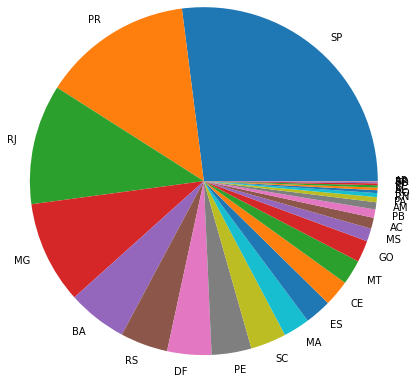

In [18]:
plt.pie(recl_estados,radius=2,labels=recl_estados.index)
plt.show()

In [19]:
# cálculo da quantidade de reclamações por sexo

recl_sexo=df1.Sexo.value_counts()
recl_sexo

M    27895
F    16092
Name: Sexo, dtype: int64

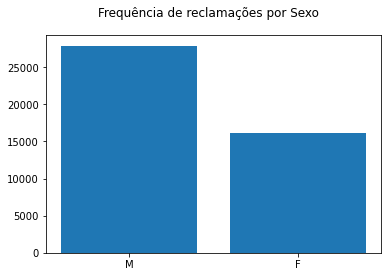

In [20]:
plt.bar(recl_sexo.index, recl_sexo)
plt.suptitle('Frequência de reclamações por Sexo')
plt.show()

In [21]:
# renomear as colunas da fonte original eliminando espaços em branco

df1.rename(columns={'Tempo Resposta':'tempo_resposta','Nota do Consumidor':'nota_consumidor'},inplace=True)

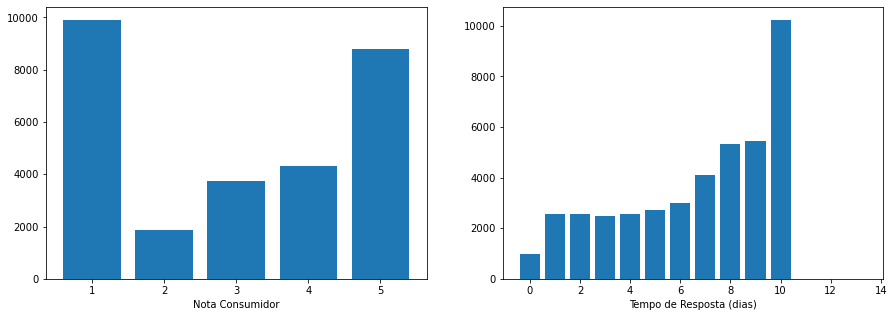

In [22]:
fig = plt.figure (figsize=[15,5])

plt.subplot(1,2,1)
plt.bar(df1.nota_consumidor.value_counts().index,df1.nota_consumidor.value_counts())
plt.xlabel('Nota Consumidor')

plt.subplot(1,2,2)
plt.bar(df1.tempo_resposta.value_counts().index,df1.tempo_resposta.value_counts())
plt.xlabel('Tempo de Resposta (dias)')

plt.show()

In [23]:
# Tempo de resposta e Nota do Consumidor são variáveis quantitativas. Usaremos correlação linear para verificar
# as relação entre elas

df1.corr()[['nota_consumidor']]

,nota_consumidor
Ano Abertura,NaN
Mês Abertura,0.073964
Prazo Analise Gestor,-0.068360
tempo_resposta,-0.187150
nota_consumidor,1.000000
Total,NaN


#### Tempo de Resposta e Nota do Consumidor tem correlação negativa de aprox. 0,18. Indica na medida em que uma aumenta, a outra diminui, ou seja, quanto menor o tempo de resposta, maior a nota atribuída ao consumidor. No entanto, a variação do tempo de resposta explica somente 18% da variação da nota.

In [24]:
nao_respondidas = round((df1[df1.Respondida=='N'].shape[0] / df1.shape[0])*100,2)
print ("As reclamações registradas e não respondidas são ",nao_respondidas,"% do total")

As reclamações registradas e não respondidas são  4.61 % do total


In [25]:
sem_nota=df1.nota_consumidor.isnull().sum()
sem_nota_pct=df1.nota_consumidor.isnull().sum() / df1.shape[0]

print ("Atendimentos sem avaliação: ", sem_nota)
print ("Percentual de atendimentos sem avaliação: ", round(sem_nota_pct*100,2),"%")

Atendimentos sem avaliação:  15360
Percentual de atendimentos sem avaliação:  34.92 %


#### Percentual significativo de atendimentos sem avaliação

In [26]:
df1[df1.nota_consumidor.isnull()]['Situação'].value_counts()

Finalizada não avaliada    13526
Cancelada                   1742
Encerrada                     92
Name: Situação, dtype: int64

##### valores nulos são originados do próprio fluxo do atendimento, não por falhas da base de dados. Ok
##### Vamos analisar com mais detalhe a predominância da nota 1 nas avaliações

In [27]:
df1[df1.nota_consumidor==1]['Avaliação Reclamação'].value_counts() / df1[df1.nota_consumidor==1].shape[0]

Não Resolvida    0.865408
Resolvida        0.134592
Name: Avaliação Reclamação, dtype: float64

##### Cerca de 86% das notas 1 são relacionadas a casos não resolvidos. Vamos analisar a relação entre as Notas dos Consumidores e o Tempo de Atendimento considerando somente os casos resolvidos

In [28]:
df_resolvidos=df1[df1['Avaliação Reclamação']=='Resolvida']

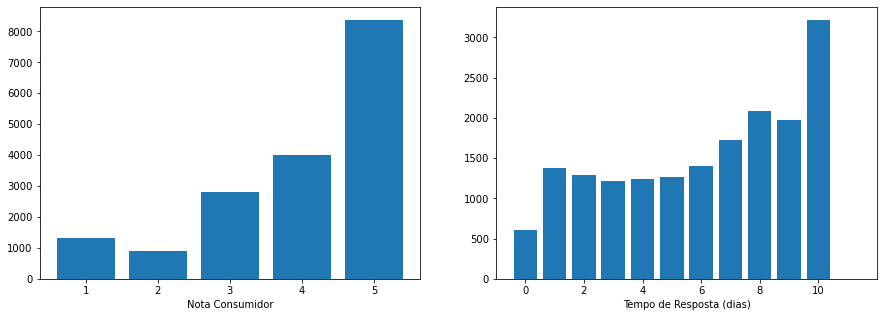

In [29]:
fig = plt.figure (figsize=[15,5])

plt.subplot(1,2,1)
plt.bar(df_resolvidos.nota_consumidor.value_counts().index,df_resolvidos.nota_consumidor.value_counts())
plt.xlabel('Nota Consumidor')

plt.subplot(1,2,2)
plt.bar(df_resolvidos.tempo_resposta.value_counts().index,df_resolvidos.tempo_resposta.value_counts())
plt.xlabel('Tempo de Resposta (dias)')

plt.show()

In [30]:
df_resolvidos.corr()[['nota_consumidor']]

,nota_consumidor
Ano Abertura,NaN
Mês Abertura,0.048857
Prazo Analise Gestor,-0.047879
tempo_resposta,-0.117957
nota_consumidor,1.000000
Total,NaN


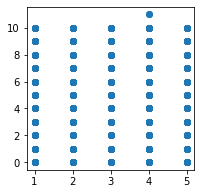

In [31]:
fig=plt.figure(figsize=[3,3])
plt.scatter(df_resolvidos.nota_consumidor,df_resolvidos.tempo_resposta)
plt.show()

##### A distribuição das frequência das notas notas é mais linear. Porém, a correlação com o tempo de resposta é ainda mais fraca. Antes 18% agora 11% (negativa). Este não parece ser uma variável que explique bem a nota atribuída ao atendimento.

#### Vamos explorar outras variáveis que possam ter alguma relação com a Nota do Consumidor

<AxesSubplot:title={'center':'nota_consumidor'}, xlabel='Área'>

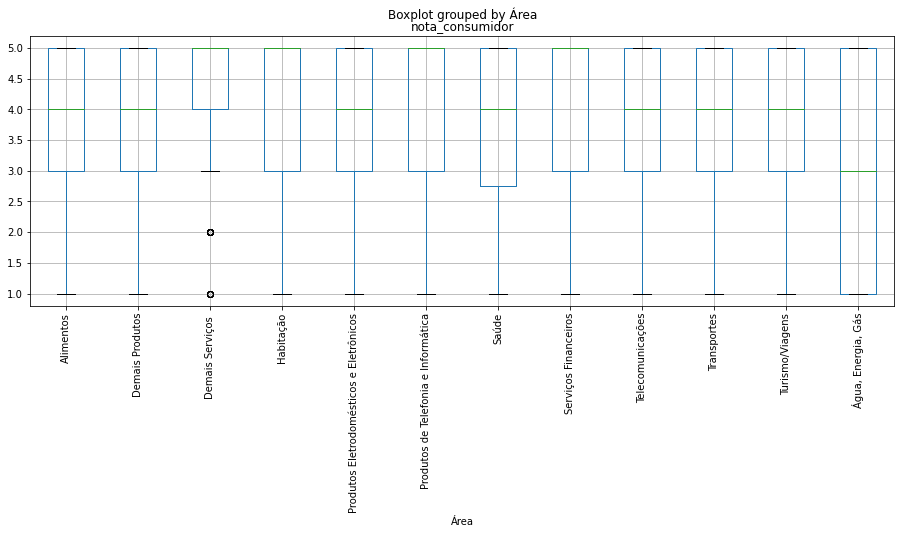

In [32]:
# Área à qual pertence o assunto objeto da reclamação:

df_resolvidos.boxplot(column='nota_consumidor',by='Área',rot=90,figsize=(15,5))

In [33]:
df_resolvidos.groupby(by='Área').apply(lambda x: x.nota_consumidor.describe())

nota_consumidor,count,mean,std,min,25%,50%,75%,max
Área,,,,,,,,
Alimentos,38.0,3.894737,1.351465,1.0,3.00,4.0,5.0,5.0
Demais Produtos,779.0,3.880616,1.325980,1.0,3.00,4.0,5.0,5.0
Demais Serviços,159.0,4.150943,1.114852,1.0,4.00,5.0,5.0,5.0
Habitação,31.0,4.064516,1.209283,1.0,3.00,5.0,5.0,5.0
Produtos Eletrodomésticos e Eletrônicos,1259.0,3.988086,1.271187,1.0,3.00,4.0,5.0,5.0
Produtos de Telefonia e Informática,2960.0,4.048986,1.202101,1.0,3.00,5.0,5.0,5.0
Saúde,56.0,3.464286,1.488920,1.0,2.75,4.0,5.0,5.0
Serviços Financeiros,3019.0,4.051010,1.225981,1.0,3.00,5.0,5.0,5.0
Telecomunicações,8877.0,3.951448,1.242557,1.0,3.00,4.0,5.0,5.0


In [34]:
# Trata-se de relacionamento entre variável categórica e quantitativa. Calcularemos o R2

var_global = np.var(df_resolvidos.nota_consumidor)
var_categ = df_resolvidos.groupby(by='Área').apply(lambda x: np.var(x.nota_consumidor))
total_categ = df_resolvidos['Área'].value_counts()

var_ = ((var_categ * total_categ).sum()) / total_categ.sum()

r_quad = (var_global - var_)/ var_global ; 

print("O r-quadrado para Área e Nota do Consumidor é:", round(r_quad*100,2))

O r-quadrado para Área e Nota do Consumidor é: 0.28


Área não é uma boa preditora para nota

<AxesSubplot:title={'center':'nota_consumidor'}, xlabel='Faixa Etária'>

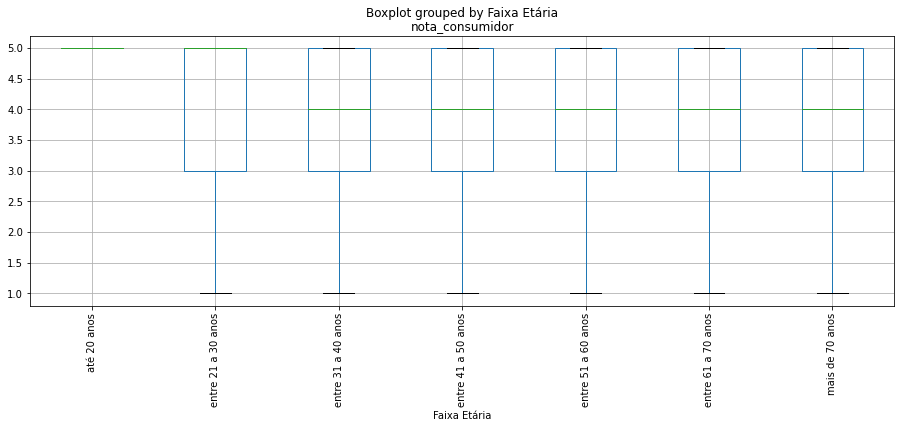

In [35]:
# Faixa etária

df_resolvidos.boxplot(column='nota_consumidor',by='Faixa Etária',rot=90,figsize=(15,5))

<AxesSubplot:title={'center':'nota_consumidor'}, xlabel='Sexo'>

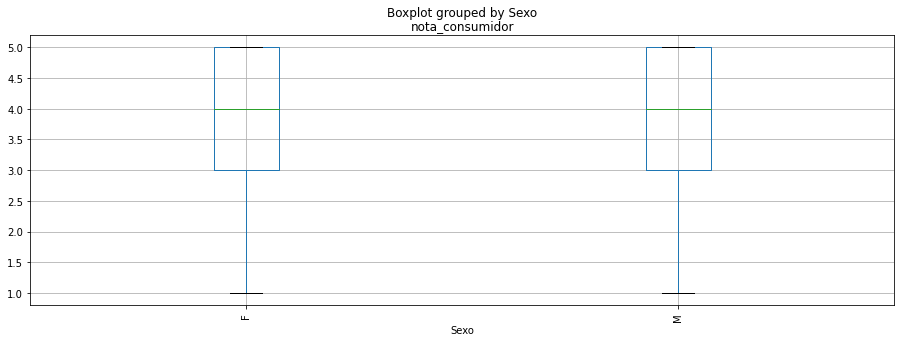

In [36]:
# Sexo

df_resolvidos.boxplot(column='nota_consumidor',by='Sexo',rot=90,figsize=(15,5))

In [37]:
df_resolvidos.groupby(by='Sexo').apply(lambda x: x['nota_consumidor'].describe())

nota_consumidor,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
F,6069.0,4.002142,1.196496,1.0,3.0,4.0,5.0,5.0
M,11358.0,3.974820,1.264131,1.0,3.0,4.0,5.0,5.0


Vamos verificar se a variável Grupo Problema tem relação com Nota do Consumidor

<AxesSubplot:title={'center':'nota_consumidor'}, xlabel='Grupo Problema'>

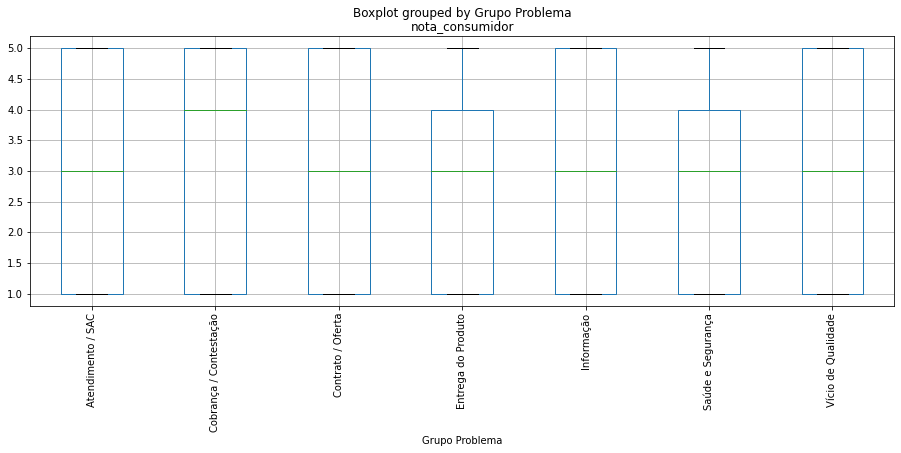

In [38]:
df1.boxplot(column='nota_consumidor',by='Grupo Problema',rot=90,figsize=(15,5))

In [39]:
df1.groupby(by='Grupo Problema').apply(lambda x: x['nota_consumidor'].describe())

nota_consumidor,count,mean,std,min,25%,50%,75%,max
Grupo Problema,,,,,,,,
Atendimento / SAC,4836.0,2.876964,1.677011,1.0,1.0,3.0,5.0,5.0
Cobrança / Contestação,9428.0,3.265592,1.638191,1.0,1.0,4.0,5.0,5.0
Contrato / Oferta,7292.0,2.863686,1.730764,1.0,1.0,3.0,5.0,5.0
Entrega do Produto,1276.0,2.657524,1.598857,1.0,1.0,3.0,4.0,5.0
Informação,392.0,2.859694,1.708474,1.0,1.0,3.0,5.0,5.0
Saúde e Segurança,140.0,2.757143,1.626540,1.0,1.0,3.0,4.0,5.0
Vício de Qualidade,5263.0,2.964279,1.654686,1.0,1.0,3.0,5.0,5.0


In [40]:
var_global = np.var(df1.nota_consumidor)
var_categ = df1.groupby(by='Grupo Problema').apply(lambda x: np.var(x.nota_consumidor))
total_categ = df1['Grupo Problema'].value_counts()

var_ = ((var_categ * total_categ).sum()) / total_categ.sum()

r_quad = (var_global - var_)/ var_global ; 

print("O r-quadrado para Grupo Problema e Nota do Consumidor é:", round(r_quad*100,2))

O r-quadrado para Grupo Problema e Nota do Consumidor é: 1.44


R2 é de 1,44%. Portanto, a variável Grupo Problema não é uma boa preditora para a nota do consumidor

#### Vamos verificar se o Grupo do Problema relaciona-se com Avaliação Reclamação

In [41]:
df_grupo_prob = df1.groupby(by='Grupo Problema').apply(lambda x: x['Avaliação Reclamação'].value_counts()).unstack()

In [42]:
df_grupo_prob

,Não Avaliada,Não Resolvida,Resolvida
Grupo Problema,,,
Atendimento / SAC,2213,1949,2887
Cobrança / Contestação,4439,2929,6499
Contrato / Oferta,2879,3302,3990
Entrega do Produto,711,494,782
Informação,155,182,210
Saúde e Segurança,74,77,63
Vício de Qualidade,3055,2267,2996


In [43]:
df_grupo_pct = pd.DataFrame(np.c_[df_grupo_prob.iloc[:,0].values / df_grupo_prob.sum(axis=1).values, \
                 df_grupo_prob.iloc[:,1].values / df_grupo_prob.sum(axis=1).values, \
                 df_grupo_prob.iloc[:,2].values / df_grupo_prob.sum(axis=1).values], \
                 columns=df_grupo_prob.columns,index=df_grupo_prob.index)

In [44]:
df_grupo_pct.loc['Geral'] = df_grupo_prob.sum() / df_grupo_prob.sum().sum()

In [45]:
df_grupo_pct

,Não Avaliada,Não Resolvida,Resolvida
Grupo Problema,,,
Atendimento / SAC,0.313945,0.276493,0.409562
Cobrança / Contestação,0.320112,0.211221,0.468667
Contrato / Oferta,0.283060,0.324649,0.392292
Entrega do Produto,0.357826,0.248616,0.393558
Informação,0.283364,0.332724,0.383912
Saúde e Segurança,0.345794,0.359813,0.294393
Vício de Qualidade,0.367276,0.272541,0.360183
Geral,0.320879,0.265699,0.413423


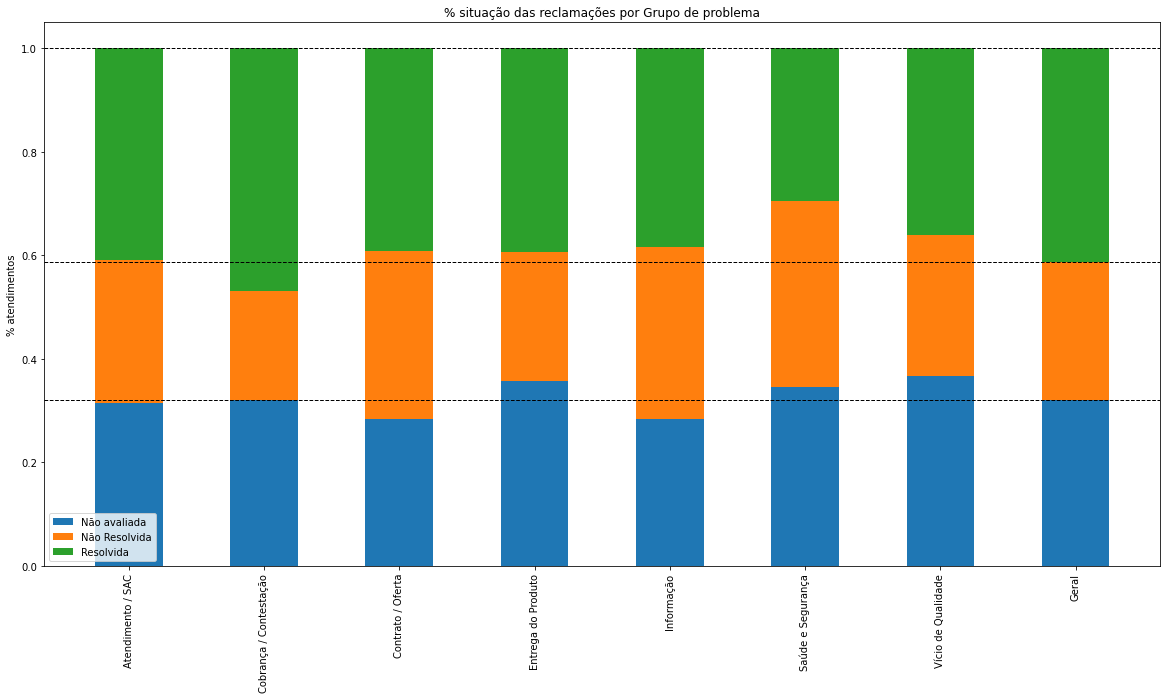

In [46]:
labels = df_grupo_pct.index
x = np.arange(len(labels))
width = 0.5

plt.figure(figsize=[20,10])
plt.bar(x,df_grupo_pct.iloc[:,0].values,width,label= 'Não avaliada')
plt.bar(x,df_grupo_pct.iloc[:,1].values,width, bottom = df_grupo_pct.iloc[:,0].values, label= 'Não Resolvida')
plt.bar(x,df_grupo_pct.iloc[:,2].values,width, bottom = (df_grupo_pct.iloc[:,1].values+df_grupo_pct.iloc[:,0].values), label= 'Resolvida')
plt.ylabel('% atendimentos')
plt.legend()
plt.axhline(y = df_grupo_pct.iloc[7,0],linestyle="--",linewidth=1,color='black')
plt.axhline(y = (df_grupo_pct.iloc[7,1]+df_grupo_pct.iloc[7,0]),linestyle="--",linewidth=1,color='black')
plt.axhline(y = (df_grupo_pct.iloc[7,2]+df_grupo_pct.iloc[7,1]+df_grupo_pct.iloc[7,0]),linestyle="--",linewidth=1,color='black')
plt.title('% situação das reclamações por Grupo de problema')
plt.xticks(x,labels)
#plt.annotate('% Resolvido Geral',(12.3,33))
plt.tick_params(axis='x',labelrotation=90)

plt.show()

O gráfico de barras mostra diferenças nos percentuais das resoluções das reclamações nos diversos grupos de atendimentos.


h0 (nula) - As variáveis Grupo Problema e Avaliação Reclamação possuem relação direta entre si
h1 (alternativa) - As variáveis Grupo Problema e Avaliação Reclamação são independentes

São duas varáveis categóricas, portanto utilizaremos chi-quadrado como métrica.

In [47]:
df_grupo_prob['Total'] = df_grupo_prob.sum(axis=1)

In [48]:
esp_0 = round((df_grupo_prob.iloc[:,3] * df_grupo_pct.loc['Geral','Não Avaliada']),1)
esp_1 = round((df_grupo_prob.iloc[:,3] * df_grupo_pct.loc['Geral','Não Resolvida']),1)
esp_2 = round((df_grupo_prob.iloc[:,3] * df_grupo_pct.loc['Geral','Resolvida']),1)

df_grupo_esp = pd.DataFrame(np.c_[esp_0,esp_1,esp_2])
df_grupo_esp

,0,1,2
0,2261.9,1872.9,2914.2
1,4449.6,3684.4,5732.9
2,3263.7,2702.4,4204.9
3,637.6,527.9,821.5
4,175.5,145.3,226.1
5,68.7,56.9,88.5
6,2669.1,2210.1,3438.8


In [49]:
desvios_ao_2 = (df_grupo_prob.iloc[:,:3].values - df_grupo_esp.values) ** 2
desvios_ao_2

array([[2.3912100e+03, 5.7912100e+03, 7.3984000e+02],
       [1.1236000e+02, 5.7062916e+05, 5.8690921e+05],
       [1.4799409e+05, 3.5952016e+05, 4.6182010e+04],
       [5.3875600e+03, 1.1492100e+03, 1.5602500e+03],
       [4.2025000e+02, 1.3468900e+03, 2.5921000e+02],
       [2.8090000e+01, 4.0401000e+02, 6.5025000e+02],
       [1.4891881e+05, 3.2376100e+03, 1.9607184e+05]])

In [50]:
chi_quad_grupo = sum(sum(desvios_ao_2 / df_grupo_esp.values))
chi_quad_grupo

605.5163490320904

O valor elevado de chi-quadrado nos leva a confirmar h0 (Grupo Problema e Avaliação Reclamação possuem relação direta)

#### Vamos verificar se a Área a qual pertence o objeto da reclamação relaciona-se com resolução da reclamação.
##### (vamos utilizar somente as reclamações que foram resolvidas e não resolvidas, exlcuindo as não avaliadas)

In [51]:
df_areas = df1.groupby(by='Área').apply(lambda x: x['Avaliação Reclamação'].value_counts()).unstack()
df_areas = df_areas.fillna(value=0).astype(int)
df_areas = df_areas.drop(columns='Não Avaliada')
df_areas

,Não Resolvida,Resolvida
Área,,
Alimentos,24,38
Demais Produtos,667,779
Demais Serviços,94,159
Educação,3,0
Habitação,15,31
Produtos Eletrodomésticos e Eletrônicos,1144,1259
Produtos de Telefonia e Informática,1803,2960
Saúde,96,56
Serviços Financeiros,2265,3019


In [52]:
pct_nres = df_areas.iloc[:,0] / (df_areas.iloc[:,0] + df_areas.iloc[:,1])
pct_res = df_areas.iloc[:,1] / (df_areas.iloc[:,0] + df_areas.iloc[:,1])

In [53]:
df_areas['Total']=df_areas.sum(axis=1).values
df_areas

,Não Resolvida,Resolvida,Total
Área,,,
Alimentos,24,38,62
Demais Produtos,667,779,1446
Demais Serviços,94,159,253
Educação,3,0,3
Habitação,15,31,46
Produtos Eletrodomésticos e Eletrônicos,1144,1259,2403
Produtos de Telefonia e Informática,1803,2960,4763
Saúde,96,56,152
Serviços Financeiros,2265,3019,5284


In [54]:
df_areas_pct = pd.DataFrame(np.c_[pct_nres,pct_res],index=df_areas.index,columns=df_areas.columns[0:2])
df_areas_pct

,Não Resolvida,Resolvida
Área,,
Alimentos,0.387097,0.612903
Demais Produtos,0.461272,0.538728
Demais Serviços,0.371542,0.628458
Educação,1.000000,0.000000
Habitação,0.326087,0.673913
Produtos Eletrodomésticos e Eletrônicos,0.476072,0.523928
Produtos de Telefonia e Informática,0.378543,0.621457
Saúde,0.631579,0.368421
Serviços Financeiros,0.428653,0.571347


In [55]:
avaliacoes_nres=df_areas.iloc[:,:2].sum() / df_areas.iloc[:,:2].sum().sum()
avaliacoes_nres

Não Resolvida    0.391239
Resolvida        0.608761
dtype: float64

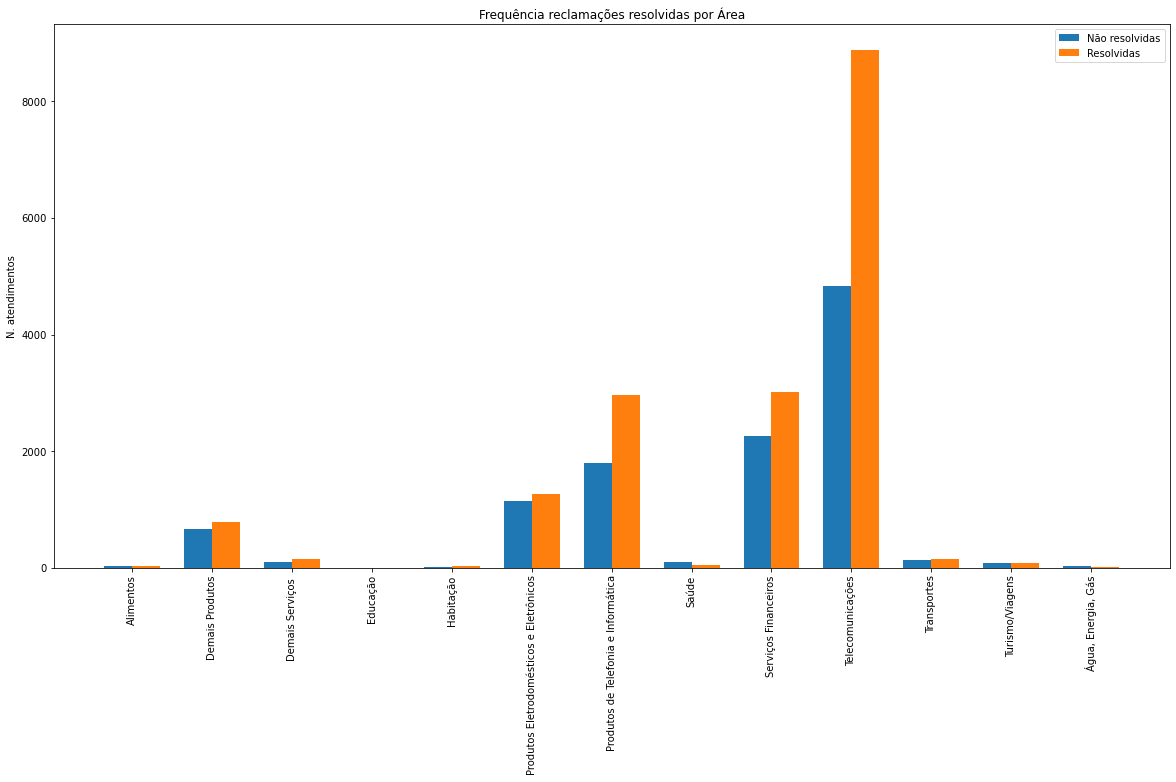

In [56]:
labels = df_areas.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=[20,10])
plt.bar(x-width/2,df_areas.iloc[:,0].values,width,label= 'Não resolvidas')
plt.bar(x+width/2,df_areas.iloc[:,1].values,width,label= 'Resolvidas')
plt.ylabel('N. atendimentos')
plt.legend()

plt.title('Frequência reclamações resolvidas por Área')
plt.xticks(x,labels)

plt.tick_params(axis='x',labelrotation=90)

plt.show()

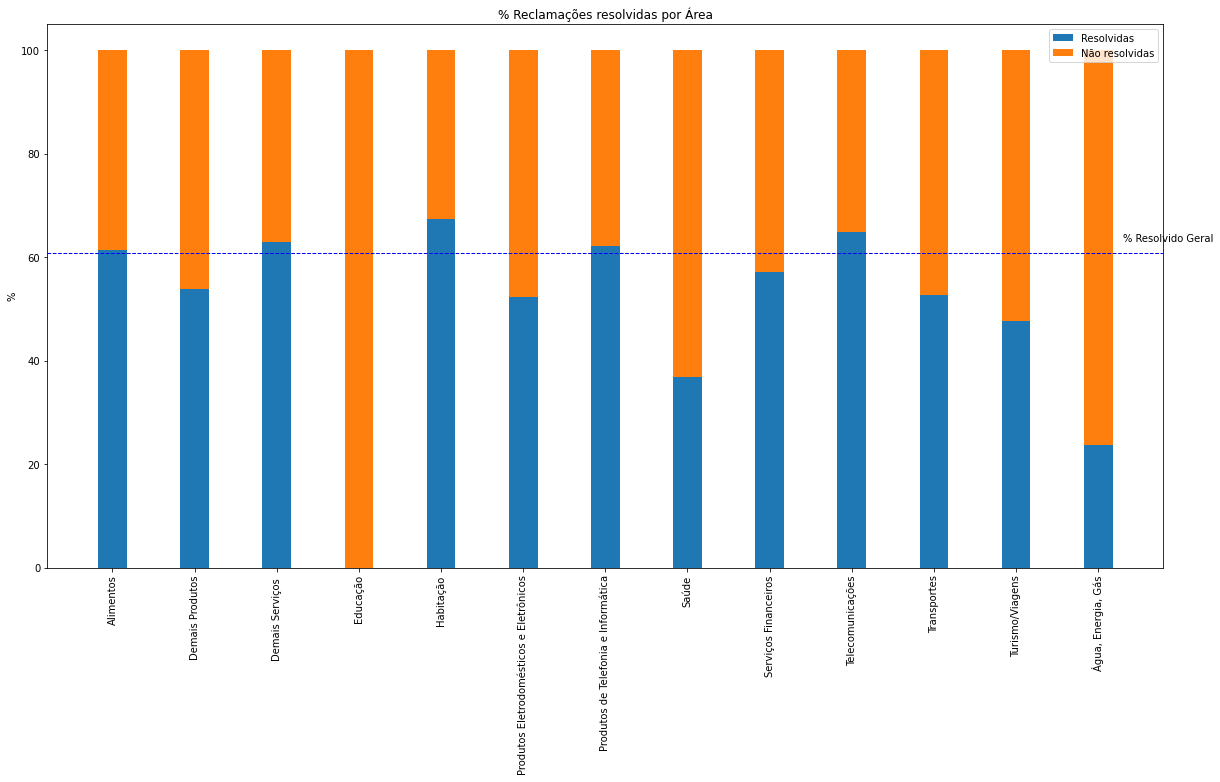

In [57]:
labels = df_areas_pct.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=[20,10])
plt.bar(x,pct_res*100,width,label= 'Resolvidas')
plt.bar(x,pct_nres*100,width,bottom=(pct_res*100),label= 'Não resolvidas')

plt.ylabel('%')
plt.legend()
plt.axhline(y = avaliacoes_nres[1]*100,linestyle="--",linewidth=1,color='blue')
plt.title('% Reclamações resolvidas por Área')
plt.xticks(x,labels)
plt.annotate('% Resolvido Geral',(12.3,63))
plt.tick_params(axis='x',labelrotation=90)

plt.show()

In [59]:
esp_0 = round((df_areas.iloc[:,2] * avaliacoes_nres[0]),1)
esp_1 = round((df_areas.iloc[:,2] * avaliacoes_nres[1]),1)

df_areas_esp = pd.DataFrame(np.c_[esp_0,esp_1])
df_areas_esp

,0,1
0,24.3,37.7
1,565.7,880.3
2,99.0,154.0
3,1.2,1.8
4,18.0,28.0
5,940.1,1462.9
6,1863.5,2899.5
7,59.5,92.5
8,2067.3,3216.7
9,5361.9,8343.1


In [60]:
desvios_ao_2 = (df_areas.iloc[:,:2].values - df_areas_esp.values) ** 2
desvios_ao_2

array([[9.0000000e-02, 9.0000000e-02],
       [1.0261690e+04, 1.0261690e+04],
       [2.5000000e+01, 2.5000000e+01],
       [3.2400000e+00, 3.2400000e+00],
       [9.0000000e+00, 9.0000000e+00],
       [4.1575210e+04, 4.1575210e+04],
       [3.6602500e+03, 3.6602500e+03],
       [1.3322500e+03, 1.3322500e+03],
       [3.9085290e+04, 3.9085290e+04],
       [2.8504921e+05, 2.8504921e+05],
       [6.0516000e+02, 6.0516000e+02],
       [5.1529000e+02, 5.1529000e+02],
       [1.9881000e+02, 1.9881000e+02]])

In [61]:
chi_quad_areas = sum(sum(desvios_ao_2 / df_areas_esp.values))
chi_quad_areas

309.5846879998762

Valor de chi-quadrado elevado nos leva a confirmar h0